<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Laboratorio_01_pandas_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [242]:
!pip install -q seaborn

In [243]:
#Tipo de dato de tiempo en Pandas
#En este ejemplo vamos a crear una serie de tiempo de un mes cada dia cada hora
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

# range_date
rd = pd.date_range(start ='1/1/2025', end ='2/1/2025', freq ='h')
print(rd)
print(type(rd[2]))
print(len(rd))

DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00', '2025-01-01 05:00:00',
               '2025-01-01 06:00:00', '2025-01-01 07:00:00',
               '2025-01-01 08:00:00', '2025-01-01 09:00:00',
               ...
               '2025-01-31 15:00:00', '2025-01-31 16:00:00',
               '2025-01-31 17:00:00', '2025-01-31 18:00:00',
               '2025-01-31 19:00:00', '2025-01-31 20:00:00',
               '2025-01-31 21:00:00', '2025-01-31 22:00:00',
               '2025-01-31 23:00:00', '2025-02-01 00:00:00'],
              dtype='datetime64[ns]', length=745, freq='h')
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
745


In [244]:
#Creamos un dataframe con una columna aleatoria y el tiempo como indice
df = pd.DataFrame(rd, columns=['datetime'])
df['data'] = np.random.randint(0, 100, size=(len(rd)))
df.set_index('datetime', inplace=True)
df.head()
df.tail()

,data
datetime,
2025-01-31 20:00:00,66
2025-01-31 21:00:00,42
2025-01-31 22:00:00,96
2025-01-31 23:00:00,90
2025-02-01 00:00:00,70


In [245]:
#Podemos usar el indice como una columna de la misma manera que usamos los otros tipos
filtered_df = df.loc['2025-01-31']
print(filtered_df)


                     data
datetime                 
2025-01-31 00:00:00    45
2025-01-31 01:00:00    75
2025-01-31 02:00:00    40
2025-01-31 03:00:00    10
2025-01-31 04:00:00    63
2025-01-31 05:00:00     5
2025-01-31 06:00:00    75
2025-01-31 07:00:00    38
2025-01-31 08:00:00    91
2025-01-31 09:00:00    46
2025-01-31 10:00:00    45
2025-01-31 11:00:00    49
2025-01-31 12:00:00    47
2025-01-31 13:00:00    25
2025-01-31 14:00:00    58
2025-01-31 15:00:00     0
2025-01-31 16:00:00    38
2025-01-31 17:00:00    34
2025-01-31 18:00:00    94
2025-01-31 19:00:00     5
2025-01-31 20:00:00    66
2025-01-31 21:00:00    42
2025-01-31 22:00:00    96
2025-01-31 23:00:00    90




# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


In [246]:
#1. Lectura del dataframe

path = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


In [247]:
#2. Poner el tiempo como indice

df.set_index('time', inplace=True)
df.head()
df.tail()

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,
2023-05-12 19:00:00,4995,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,4996,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,4997,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
2023-05-12 22:00:00,4998,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140
2023-05-12 23:00:00,4999,1.08521,1.08522,1.08478,1.08494,706,8,0,1.085075,-0.00024,-0.00010,-0.000170


periodicidad de una hora. El data frame contiene el precio de apertura, cierre, valor más bajo cotizado, valor más alto cotizado, volumen, spread

3. Información del dataframe sabiendo sus columnas, número de datos y visualización.

In [248]:
#3. Información 

df.columns

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'tick_volume', 'spread',
       'real_volume', 'MeanCloseOpen', 'Diff_Close', 'Diff_Open',
       'Diff_MeanCloseOpen'],
      dtype='object')

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   open                5000 non-null   float64
 2   high                5000 non-null   float64
 3   low                 5000 non-null   float64
 4   close               5000 non-null   float64
 5   tick_volume         5000 non-null   int64  
 6   spread              5000 non-null   int64  
 7   real_volume         5000 non-null   int64  
 8   MeanCloseOpen       5000 non-null   float64
 9   Diff_Close          5000 non-null   float64
 10  Diff_Open           5000 non-null   float64
 11  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 507.8+ KB


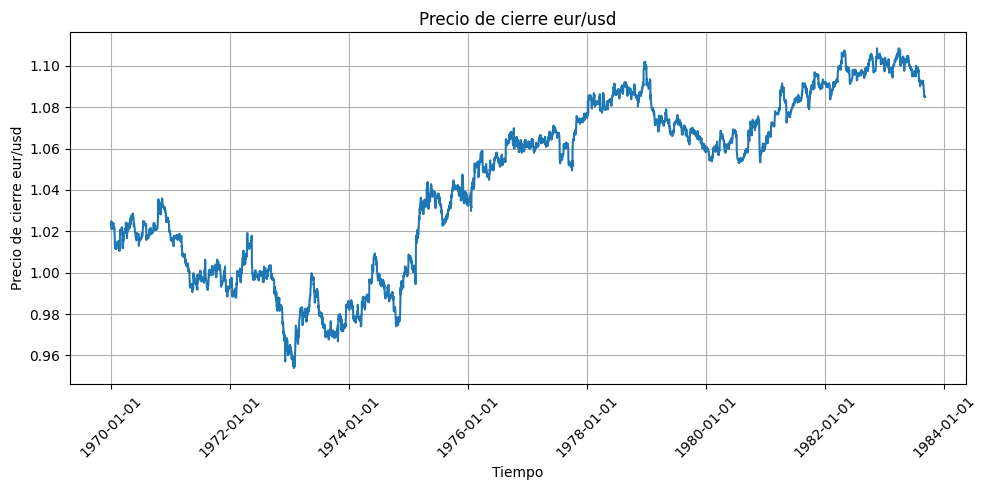

In [250]:
#Gráfica

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['close'])
ax.set_title('Precio de cierre eur/usd')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Precio de cierre eur/usd')
ax.grid()

# Formato de fecha y espaciado
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [251]:
#4. Contar y eliminar en caso tal.

total_nan = df.isna().sum().sum()
print(f"Total de valores NaN en el DataFrame: {total_nan}")

total_null = df.isnull().sum().sum()
print(f"Total de valores null en el DataFrame es {total_null}")

Total de valores NaN en el DataFrame: 0
Total de valores null en el DataFrame es 0


In [252]:
#5. Notacion y eliminación de columnas

def PascalCase(dataframe):
  newdf = dataframe.strip().title().replace("_","")
  return newdf

new_df = df.rename(mapper = PascalCase, axis="columns")
new_df.head()

,Unnamed: 0,Open,High,Low,Close,TickVolume,Spread,RealVolume,Meancloseopen,DiffClose,DiffOpen,DiffMeancloseopen
time,,,,,,,,,,,,
2022-07-25 13:00:00,0,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,2,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


In [253]:
df_cuentas = pd.DataFrame(new_df['Close'])
df_cuentas

,Close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181
...,...
2023-05-12 19:00:00,1.08514
2023-05-12 20:00:00,1.08546
2023-05-12 21:00:00,1.08531


6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:

In [254]:
#6. Mejor distribución estadística

#6.1 Diferencia de precio entre horas.

#Quitar el primero
df_cuentas['DiffPriceClose'] = df_cuentas.Close.diff()
df_cuentas.drop(df_cuentas.index[0], inplace=True)
df_cuentas.head()

,Close,DiffPriceClose
time,,
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304
2022-07-25 18:00:00,1.02099,-0.00082


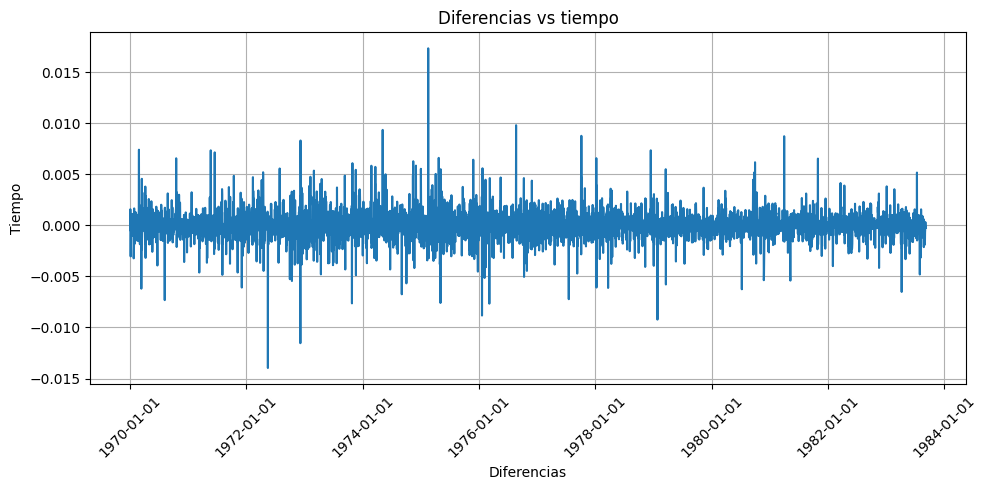

In [255]:
#6.2 Gráficas.

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_cuentas.index,df_cuentas['DiffPriceClose'])
ax.set_title('Diferencias vs tiempo')
ax.set_xlabel('Diferencias')
ax.set_ylabel('Tiempo')
ax.grid()

# Formato de fecha y espaciado
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


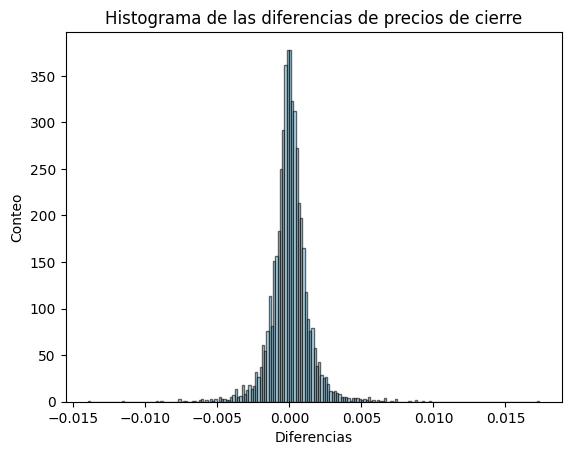

In [256]:
#6.2 Histograma de los datos.

plt.hist(df_cuentas["DiffPriceClose"], bins = 200, color='skyblue', edgecolor='black', alpha = 0.6)
plt.title('Histograma de las diferencias de precios de cierre')
plt.xlabel('Diferencias')
plt.ylabel('Conteo')
plt.show()

In [257]:
!pip install -q fitter

from fitter import Fitter, get_common_distributions, get_distributions

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.

2025-05-08 09:14:03.638 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=845297.043246)
2025-05-08 09:14:03.651 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=106744.023571)
2025-05-08 09:14:03.656 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=477261.534704)
2025-05-08 09:14:03.657 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=799277.888684)
2025-05-08 09:14:03.674 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=23122.545603)
2025-05-08 09:14:03.687 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=798749.421154)
2025-05-08 09:14:03.728 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=465484.062385)
2025-05-08 09:14:03.791 | INFO     | fitter.fitter:_fit_

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,23122.545603,-311.443279,-298.409293,inf,0.042450,2.893321e-08
lognorm,106500.661168,3074.521081,3094.072060,inf,0.091597,5.996555e-37
norm,106744.023571,3180.994184,3194.028170,inf,0.090533,4.194767e-36
chi2,465484.062385,7.690727,27.241707,inf,0.303465,0.000000e+00
rayleigh,477261.534704,inf,inf,inf,0.385571,0.000000e+00


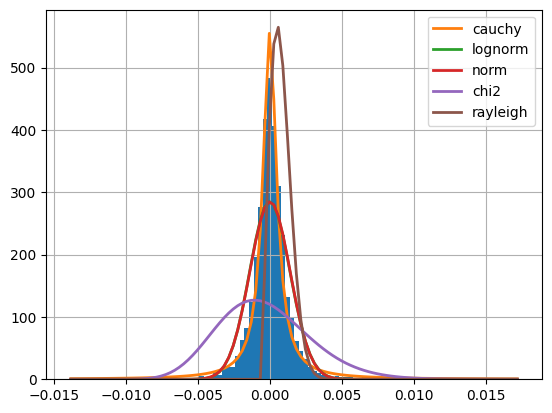

In [258]:
#6.3 Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:

f = Fitter(df_cuentas['DiffPriceClose'],
           distributions= get_common_distributions())
f.fit()
f.summary()

In [259]:
f.get_best()

{'cauchy': {'loc': -3.886416787281632e-06, 'scale': 0.0005716470285645184}}

La distribución que mejor se ajusta a este conjunto de datos es la distribución de Cauchy con un error cuadrático medio de 23122.545603.(el menor error en las comparaciones de todas las distribuciones).

In [260]:
#7. Seleccionar solo los datos del 2023.

df_cuentas.index = pd.to_datetime(df_cuentas.index)
df_cuentas_filtrado =  df_cuentas[df_cuentas.index.year == 2023]
df_cuentas_filtrado

,Close,DiffPriceClose
time,,
2023-01-02 00:00:00,1.06796,-0.00200
2023-01-02 01:00:00,1.06965,0.00169
2023-01-02 02:00:00,1.07058,0.00093
2023-01-02 03:00:00,1.06896,-0.00162
2023-01-02 04:00:00,1.06880,-0.00016
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


In [261]:
# 8. Asociar por periodicidad

media_7_dias = df_cuentas_filtrado.groupby(pd.Grouper(freq='7d')).mean() #una semana
media_15_dias = df_cuentas_filtrado.groupby(pd.Grouper(freq='15d')).mean() #15 días
media_1_mes = df_cuentas_filtrado.groupby(pd.Grouper(freq='ME')).mean() #1 mes

media_7_dias

,Close,DiffPriceClose
time,,
2023-01-02,1.059972,-0.000047
2023-01-09,1.076002,0.000156
2023-01-16,1.082041,0.000020
2023-01-23,1.088414,0.000010
2023-01-30,1.089281,-0.000062
2023-02-06,1.073363,-0.000097
2023-02-13,1.069648,0.000014
2023-02-20,1.063374,-0.000124
2023-02-27,1.060854,0.000073


In [262]:
media_15_dias

,Close,DiffPriceClose
time,,
2023-01-02,1.069361,0.000047
2023-01-17,1.085565,0.000015
2023-02-01,1.077679,-0.000066
2023-02-16,1.063150,-0.000034
2023-03-03,1.063186,0.000026
2023-03-18,1.080936,0.000074
2023-04-02,1.093090,0.000063
2023-04-17,1.099084,-0.000006
2023-05-02,1.098889,-0.000059


In [263]:
media_1_mes

,Close,DiffPriceClose
time,,
2023-01-31,1.077463,0.000031
2023-02-28,1.071167,-0.000060
2023-03-31,1.070874,0.000049
2023-04-30,1.096051,0.000036
2023-05-31,1.098980,-0.000069


In [264]:
# 9.Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  

q = df_cuentas_filtrado.groupby(pd.Grouper(freq='ME'))

for name, group in q:
  print(name, group)


2023-01-31 00:00:00                        Close  DiffPriceClose
time                                        
2023-01-02 00:00:00  1.06796        -0.00200
2023-01-02 01:00:00  1.06965         0.00169
2023-01-02 02:00:00  1.07058         0.00093
2023-01-02 03:00:00  1.06896        -0.00162
2023-01-02 04:00:00  1.06880        -0.00016
...                      ...             ...
2023-01-31 19:00:00  1.08651         0.00081
2023-01-31 20:00:00  1.08724         0.00073
2023-01-31 21:00:00  1.08641        -0.00083
2023-01-31 22:00:00  1.08724         0.00083
2023-01-31 23:00:00  1.08618        -0.00106

[528 rows x 2 columns]
2023-02-28 00:00:00                        Close  DiffPriceClose
time                                        
2023-02-01 00:00:00  1.08598        -0.00020
2023-02-01 01:00:00  1.08607         0.00009
2023-02-01 02:00:00  1.08624         0.00017
2023-02-01 03:00:00  1.08573        -0.00051
2023-02-01 04:00:00  1.08540        -0.00033
...                      ...        

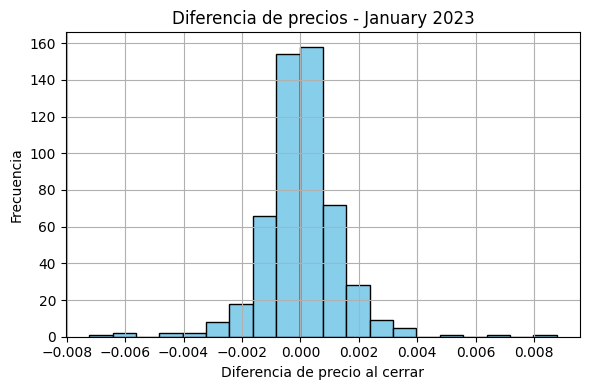

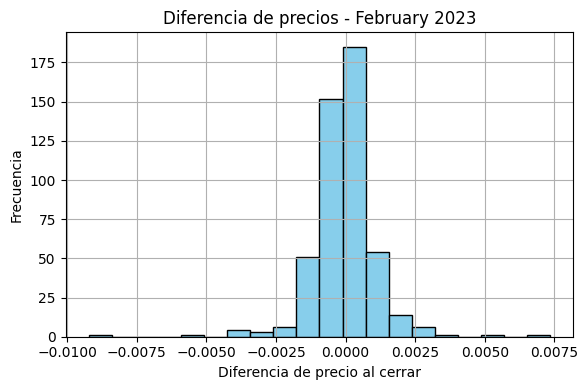

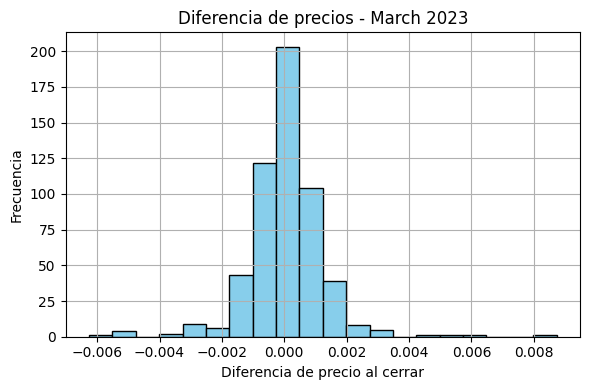

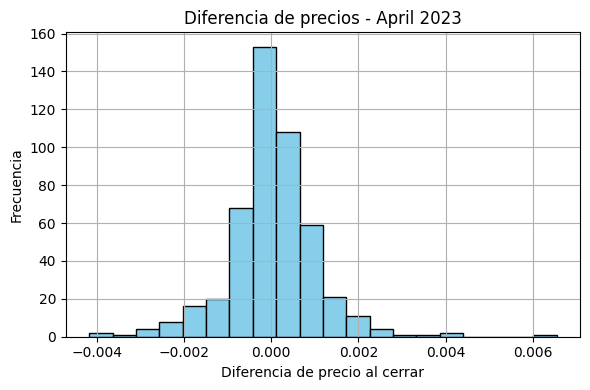

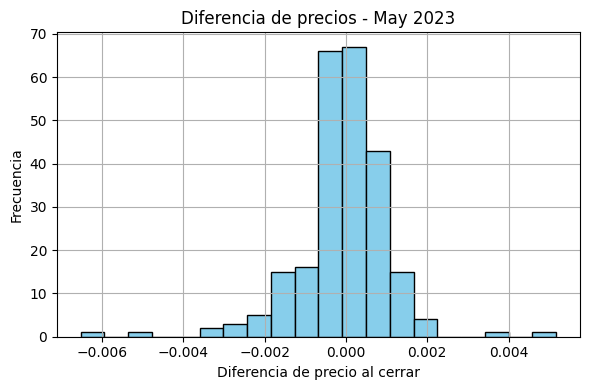

In [265]:
#Histogramas.

for name, grupo in q:
    plt.figure(figsize=(6, 4))
    plt.hist(grupo['DiffPriceClose'], bins=20, color='skyblue', edgecolor='black')  
    plt.title(f"Diferencia de precios - {name.strftime('%B %Y')}")
    plt.xlabel('Diferencia de precio al cerrar')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



In [266]:
#1. Lectura de los datos.

!pip install -q ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
#X y Y son dataframes
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [267]:
#2. Pascal case

dfX = X.rename(mapper = PascalCase, axis="columns")
dfY = y.rename(mapper = PascalCase, axis="columns")

In [268]:
#3. Usar info(), tail(), describe(), head()

#Para X

dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

In [269]:
dfX.describe()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [270]:
dfX.tail()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [271]:
dfX.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [272]:
dfY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Diagnosis  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


In [273]:
dfY.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [274]:
dfY.describe()

,Diagnosis
count,569
unique,2
top,B
freq,357


In [275]:
dfY.tail()

,Diagnosis
564,M
565,M
566,M
567,M
568,B


In [276]:
#4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

total_nanx = dfX.isna().sum().sum()
print(f"Total de valores NaN en el DataFrame X: {total_nanx}")

total_nany = dfY.isna().sum().sum()
print(f"Total de valores NaN en el DataFrame Y: {total_nany}")

total_nullx = df.isnull().sum().sum()
print(f"Total de valores null en el DataFrame X: {total_nullx}")

total_nully = df.isnull().sum().sum()
print(f"Total de valores null en el DataFrame Y: {total_nully}")

Total de valores NaN en el DataFrame X: 0
Total de valores NaN en el DataFrame Y: 0
Total de valores null en el DataFrame X: 0
Total de valores null en el DataFrame Y: 0


In [277]:
#5. 5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
# Utiliza el método `unique()` para mostrar estos valores.

dfY.Diagnosis.unique()

array(['M', 'B'], dtype=object)

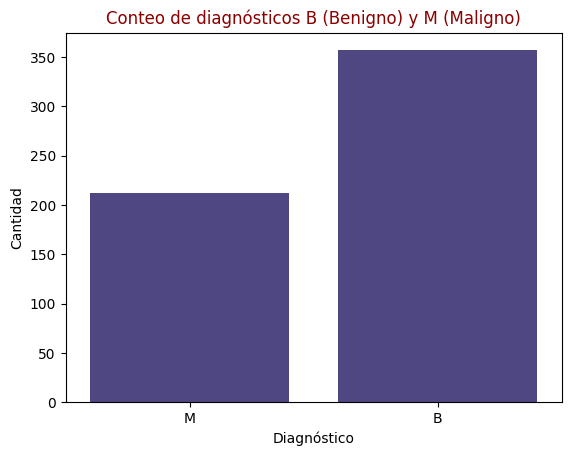

In [278]:
#6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

import seaborn as sns

sns.countplot(data=dfY, x='Diagnosis',color='darkslateblue')
plt.title('Conteo de diagnósticos B (Benigno) y M (Maligno)', color='darkred')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.show()

In [279]:
#7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno)

dfY['DiagnosisNumeric'] = dfY['Diagnosis'].map({'M': 1, 'B': 0})
dfY.head()

,Diagnosis,DiagnosisNumeric
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1


In [280]:
#8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  `(x - mean(x)) / std(x)`

def norma(x):
    mediax = np.mean(x)
    stdx = np.std(x)
    normal = (x - mediax) / stdx  
    return normal

dfXnew = dfX.apply(norma, axis=0) 
dfXnew.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.

In [281]:
dfXnew.columns

Index(['Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3'],
      dtype='object')

In [282]:
!pip install -q regex
import regex as re
from collections import defaultdict

In [283]:
#9. Agrupación

features = dfXnew.columns.tolist()

#Agrupación por precios
groups = defaultdict(list)
for col in features:
    match = re.match(r'^[a-zA-Z]+', col)
    if match:
        prefix = match.group(0)
        groups[prefix].append(col)

#Promedio
for prefix, cols in groups.items():
    dfXnew[f'{prefix}_Mean'] = dfXnew[cols].mean(axis=1)


df_grouped_means = dfXnew[[col for col in dfXnew.columns if col.endswith('_Mean')]]
dfmeans = df_grouped_means.rename(mapper = PascalCase, axis="columns")

dfmeans

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavepointsMean,SymmetryMean,FractaldimensionMean
0,1.824496,-1.332631,2.135522,1.824397,0.887384,2.405680,1.828809,1.829790,2.038965,1.699948
1,1.378334,-0.533026,1.161469,1.513866,-0.602642,-0.536814,-0.203792,0.631797,-0.349316,-0.228969
2,1.440145,-0.115957,1.254969,1.398835,0.390871,0.983610,0.810510,1.805686,0.776325,0.032314
3,-0.241333,0.092436,-0.185344,-0.534288,2.455843,3.346862,1.575001,1.580833,4.548702,3.964480
4,1.439805,-1.136277,1.462767,1.412437,0.661332,0.059142,0.937554,1.100652,-0.413002,-0.153407
...,...,...,...,...,...,...,...,...,...,...
564,2.264753,0.303399,2.064310,2.321114,0.835531,0.045849,1.092599,2.005764,-0.937054,-0.490713
565,1.514025,2.131157,1.398243,1.503455,-0.337594,-0.160804,0.393939,0.935309,-0.312893,-0.841048
566,0.482846,1.054352,0.509456,0.395519,-0.676471,0.324444,0.294727,0.377334,-0.935027,-0.392423
567,1.652505,1.753490,1.908218,1.465964,0.927731,3.064903,2.598944,1.911524,1.460970,1.389129


In [284]:
#10. Histograma de los tumores

#Juntemos los dataframes
df_tumores = pd.concat([dfmeans, dfY],axis=1)
df_tumores.head()

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavepointsMean,SymmetryMean,FractaldimensionMean,Diagnosis,DiagnosisNumeric
0,1.824496,-1.332631,2.135522,1.824397,0.887384,2.405680,1.828809,1.829790,2.038965,1.699948,M,1
1,1.378334,-0.533026,1.161469,1.513866,-0.602642,-0.536814,-0.203792,0.631797,-0.349316,-0.228969,M,1
2,1.440145,-0.115957,1.254969,1.398835,0.390871,0.983610,0.810510,1.805686,0.776325,0.032314,M,1
3,-0.241333,0.092436,-0.185344,-0.534288,2.455843,3.346862,1.575001,1.580833,4.548702,3.964480,M,1
4,1.439805,-1.136277,1.462767,1.412437,0.661332,0.059142,0.937554,1.100652,-0.413002,-0.153407,M,1


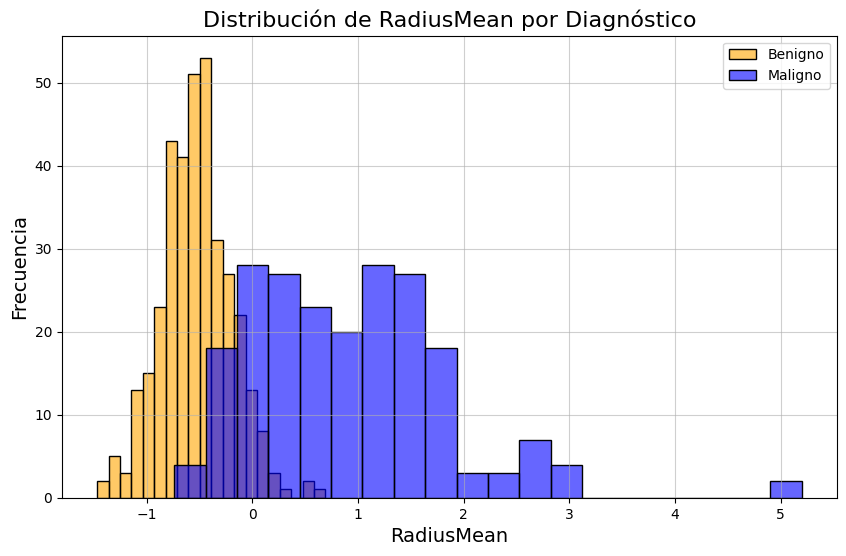

In [285]:
#10. Histograma

RadiusMean_B = df_tumores[df_tumores['Diagnosis'] == 'B']['RadiusMean']
RadiusMean_M = df_tumores[df_tumores['Diagnosis'] == 'M']['RadiusMean']

plt.figure(figsize=(10, 6))
sns.histplot(RadiusMean_B, color='orange', label='Benigno', bins=20, alpha=0.6)
sns.histplot(RadiusMean_M, color='blue', label='Maligno', bins=20, alpha=0.6)

plt.title('Distribución de RadiusMean por Diagnóstico', fontsize=16)
plt.xlabel('RadiusMean', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(True, alpha=0.6)
plt.legend()

plt.show()

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'RadiusMean'),
  Text(1, 0, 'TextureMean'),
  Text(2, 0, 'PerimeterMean'),
  Text(3, 0, 'AreaMean'),
  Text(4, 0, 'SmoothnessMean'),
  Text(5, 0, 'CompactnessMean'),
  Text(6, 0, 'ConcavityMean'),
  Text(7, 0, 'ConcavepointsMean'),
  Text(8, 0, 'SymmetryMean'),
  Text(9, 0, 'FractaldimensionMean')])

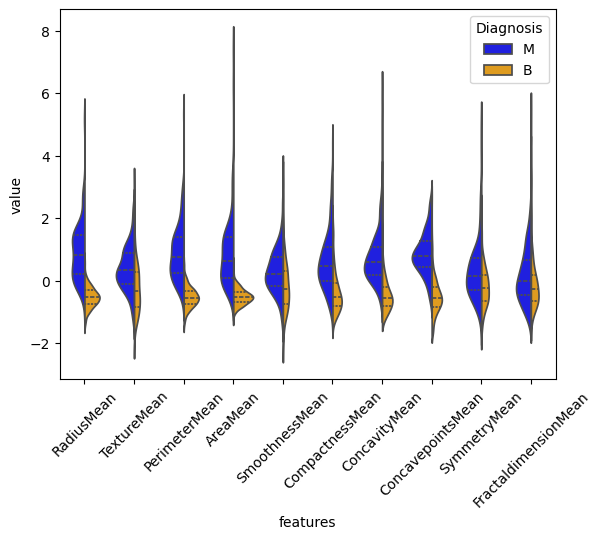

In [286]:
#11. Gráficas violín.

cols_to_melt = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 
                'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 
                'ConcavepointsMean', 'SymmetryMean', 'FractaldimensionMean']

data = pd.melt(df_tumores.iloc[:, 0:11], id_vars="Diagnosis", var_name="features", value_name="value",value_vars=cols_to_melt)
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, palette={'B': 'orange', 'M': 'blue'}, inner='quart')
plt.xticks(rotation=45)

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

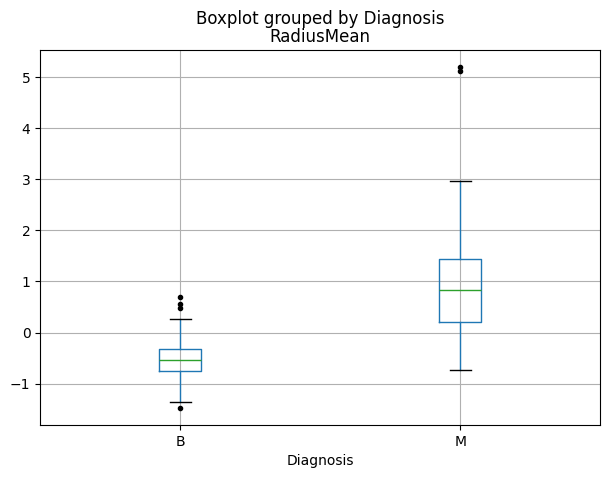

In [287]:
#12. Eliminar datos outliers usando gráficas tipo boxplot


#Visualizar los outliers
df_tumores.boxplot(column='RadiusMean', by='Diagnosis', sym='k.',figsize=(7,5))

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

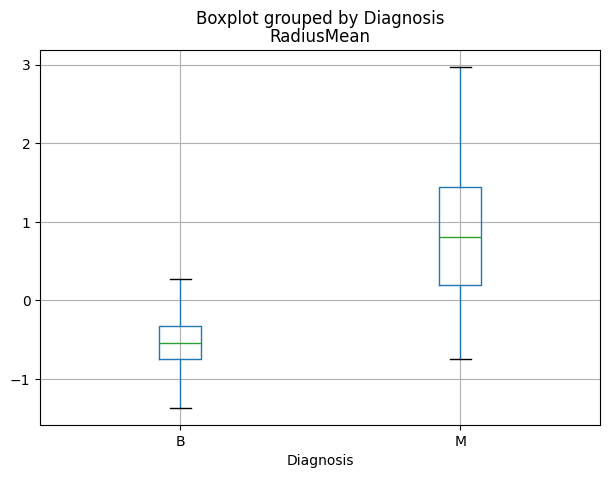

In [288]:
#12 Eliminación de outliers 

df_tumores_sin_outliers = pd.DataFrame()

for grupo in ['B', 'M']:
    #grupo
    grupo_df = df_tumores[df_tumores['Diagnosis'] == grupo]
    
    Q1 = grupo_df['RadiusMean'].quantile(0.25)
    Q3 = grupo_df['RadiusMean'].quantile(0.75)
    IQR = Q3 - Q1
    inferior = Q1 - 1.5 * IQR
    superior = Q3 + 1.5 * IQR

    grupo_filtrado = grupo_df[(grupo_df['RadiusMean'] >= inferior) & (grupo_df['RadiusMean'] <= superior)]

    df_tumores_sin_outliers = pd.concat([df_tumores_sin_outliers, grupo_filtrado])

df_tumores_sin_outliers.boxplot(column='RadiusMean', by='Diagnosis', sym='k.', figsize=(7,5))


En la gráfica anterior, ya no observamos los outliers

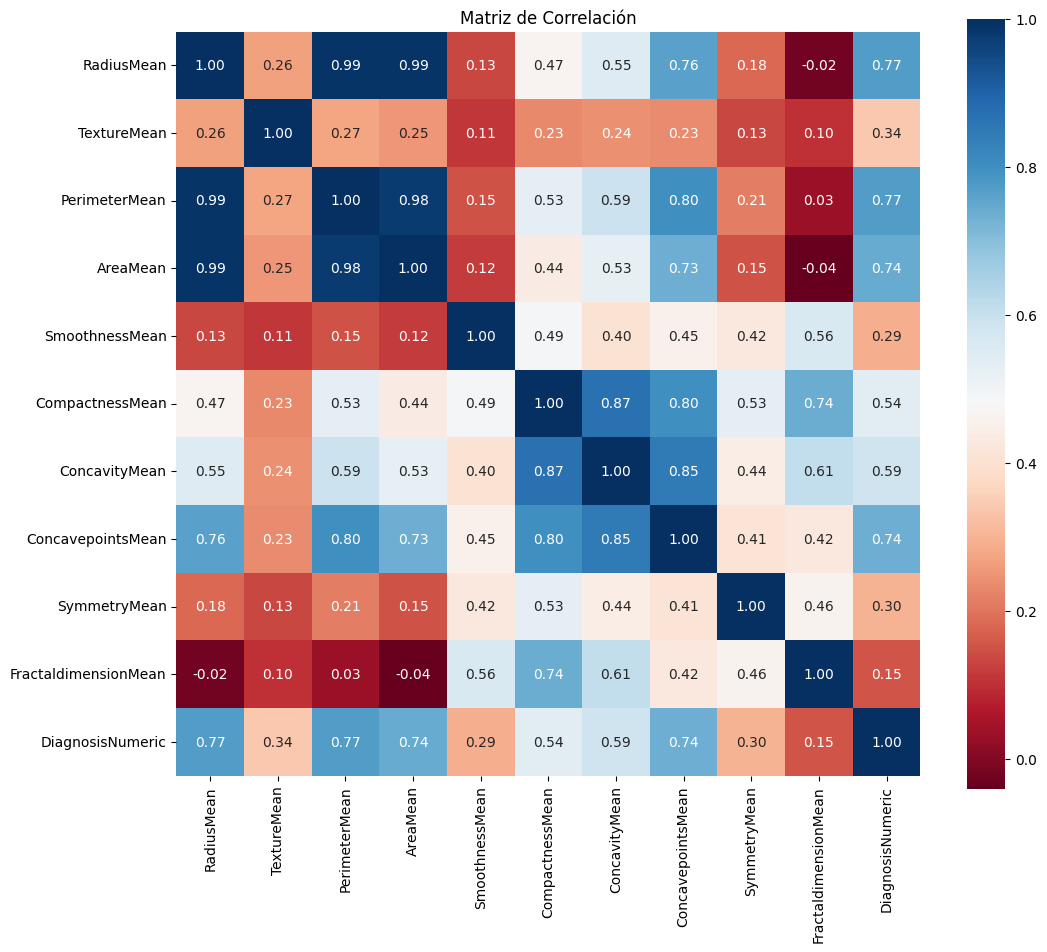

In [289]:
#13. Matrix de correlación y gráfico.

matriz_correlacion = df_tumores_sin_outliers.corr(numeric_only=True) 


plt.figure(figsize=(12, 10))  
sns.heatmap(matriz_correlacion, annot=True, cmap='RdBu', fmt=".2f", square=True)
plt.title("Matriz de Correlación")
plt.show()

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

Text(0.5, 1.0, 'Dispersiones entre la textura y el radio')

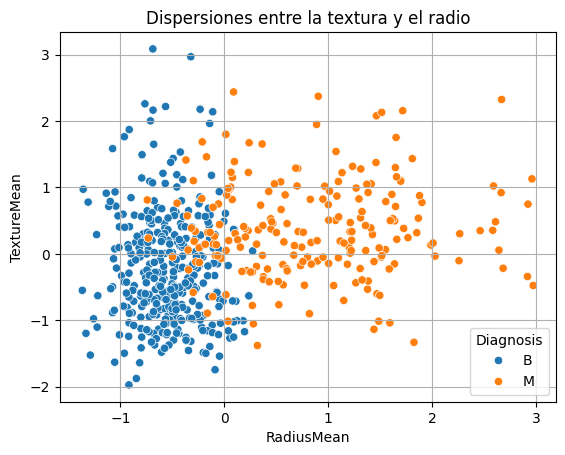

In [290]:
#1. Podemos hacer gráficos de dispersión

sns.scatterplot(data=df_tumores_sin_outliers, x='RadiusMean', y='TextureMean', hue='Diagnosis')
plt.grid()
plt.title('Dispersiones entre la textura y el radio')

2. Gráficos de la matriz de dispersión:

Me permite ver diferentes relaciones entre los datos, dispersiones y otras visualizaciones. De esta manera, poder distinguir si hay patrones entre ellos, por ejemplo de algunas gráficas podríamos comenzar a inferir una correlación positiva. (por ejemplo en la gráfica RadiusMean vs AreaMean podemos inferir correlación positiva y si nos vamos a la gráfica de la matriz de correlación podemos comprobar que en efecto así es y su valor es de 0.99)

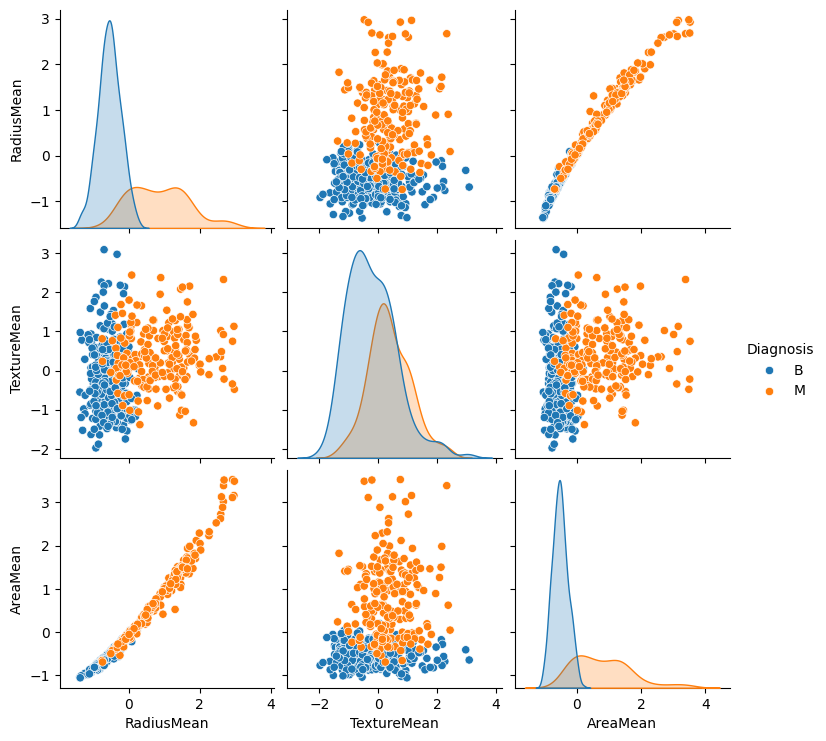

In [291]:
#2. Graficos matriz de dispersión

sns.pairplot(df_tumores_sin_outliers[['RadiusMean', 'TextureMean', 'AreaMean', 'Diagnosis']], hue='Diagnosis')
plt.show()

3. El gráfico de burbujas funciona como un gráfico de dispersión pero agregandole un tercer parámetro de comparación. En el siguiente ejemplo podemos ver una gráfica de dispersión entre los datos de la textura y el radio de los tumores, pero adicionalmente vemos un incremento de los puntos si el area del tumor es mayor. 

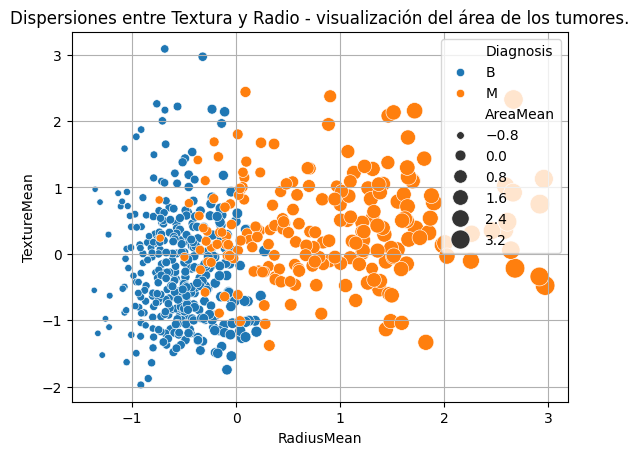

In [292]:
#3. Burbujas

sns.scatterplot(data=df_tumores_sin_outliers, x='RadiusMean', y='TextureMean', size='AreaMean', hue='Diagnosis', sizes=(20, 200))
plt.title('Dispersiones entre Textura y Radio - visualización del área de los tumores.')
plt.grid()
plt.show()